In [ ]:
# Yun Zhou (1009709442)
# Assignment 4: INF 2178 Technical Assignment 4
# MRI dataset

In [23]:
import pandas as pd

# Load the dataset
file_path = 'INF2178_A4_data.csv'
df = pd.read_csv(file_path)

# Display dataframe
df.head()


,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [24]:
from sklearn.impute import SimpleImputer

# Removing the 'Hand' column
df.drop('Hand', axis=1, inplace=True)

# Fill missing values under SES  and MMSE
imputer = SimpleImputer(strategy='median')
df['SES'] = imputer.fit_transform(df[['SES']]).ravel()
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].median())

# Convert categorical variables 'Group' and 'M/F' into binary
df = pd.get_dummies(df, columns=['Group', 'M/F'], drop_first=True)

missing_values_after = df.isnull().sum()
df.head(), missing_values_after


(   Unnamed: 0 Subject ID         MRI ID  Visit  MR Delay  Age  EDUC  SES  \
 0           0  OAS2_0001  OAS2_0001_MR1      1         0   87    14  2.0   
 1           1  OAS2_0001  OAS2_0001_MR2      2       457   88    14  2.0   
 2           2  OAS2_0002  OAS2_0002_MR1      1         0   75    12  2.0   
 3           3  OAS2_0002  OAS2_0002_MR2      2       560   76    12  2.0   
 4           5  OAS2_0004  OAS2_0004_MR1      1         0   88    18  3.0   
 
    MMSE  CDR  eTIV   nWBV    ASF  Group_Demented  Group_Nondemented  M/F_M  
 0  27.0  0.0  1987  0.696  0.883               0                  1      1  
 1  30.0  0.0  2004  0.681  0.876               0                  1      1  
 2  23.0  0.5  1678  0.736  1.046               1                  0      1  
 3  28.0  0.5  1738  0.713  1.010               1                  0      1  
 4  28.0  0.0  1215  0.710  1.444               0                  1      0  ,
 Unnamed: 0           0
 Subject ID           0
 MRI ID            

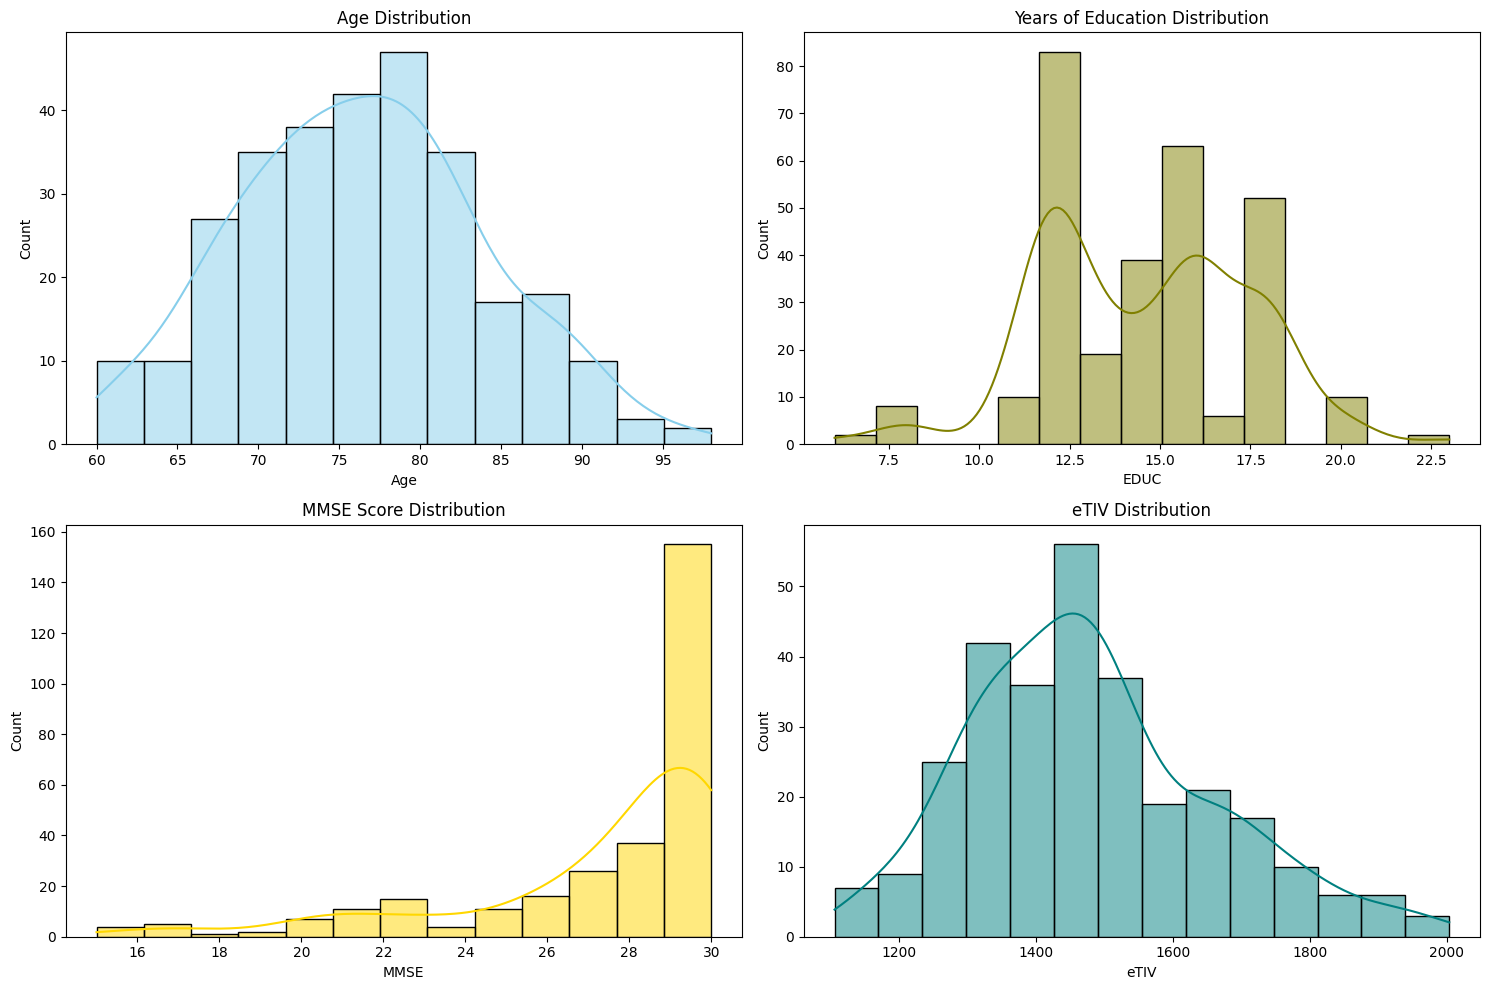

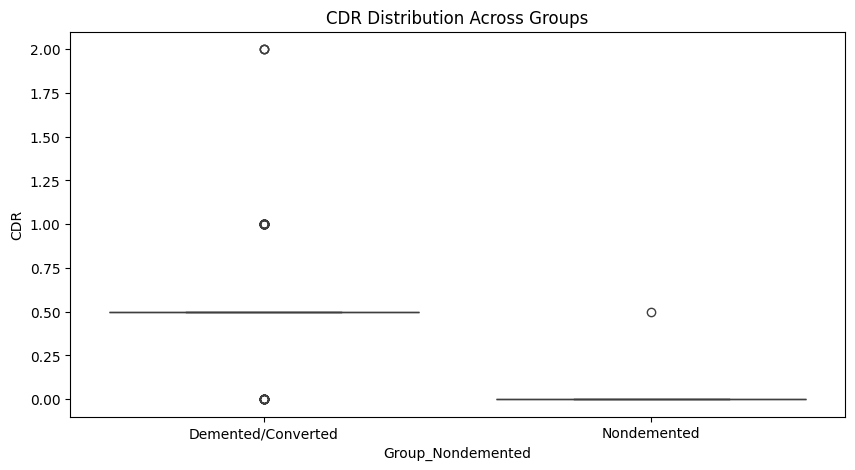

<ipython-input-25-b7ea1778af24>:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop(['Group_Demented', 'Group_Nondemented', 'M/F_M'], axis=1).corr()


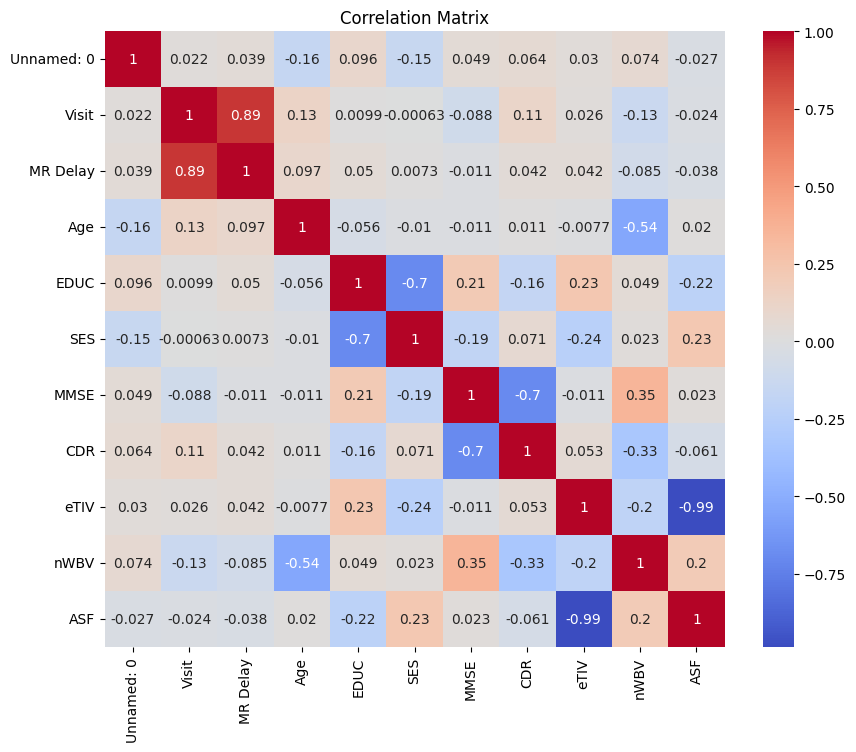

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw histograms
#sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# For Age
sns.histplot(data=df, x="Age", kde=True, ax=axs[0, 0], color="skyblue")
axs[0, 0].set_title('Age Distribution')

# For distrubution of EDUC (years of education)
sns.histplot(data=df, x="EDUC", kde=True, ax=axs[0, 1], color="olive")
axs[0, 1].set_title('Years of Education Distribution')

# For MMSE
sns.histplot(data=df, x="MMSE", kde=True, ax=axs[1, 0], color="gold")
axs[1, 0].set_title('MMSE Score Distribution')

# Distribution of eTIV
sns.histplot(data=df, x="eTIV", kde=True, ax=axs[1, 1], color="teal")
axs[1, 1].set_title('eTIV Distribution')


plt.tight_layout()
plt.show()


# Create boxplot for CDR (Clinical Dementia Rating) with different "group"
plt.figure(figsize=(10, 5))
sns.boxplot(x="Group_Nondemented", y="CDR", data=df)
plt.title('CDR Distribution Across Groups')
plt.xticks([0, 1], ['Demented/Converted', 'Nondemented'])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(['Group_Demented', 'Group_Nondemented', 'M/F_M'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


        Source         SS  DF1  DF2         MS           F         p-unc  \
0        Group  29.150447    2  141  14.575224  237.849879  6.603073e-46   
1        Visit   0.459201    1  141   0.459201   18.992137  2.512525e-05   
2  Interaction   0.506630    2  141   0.253315   10.476870  5.726420e-05   

        np2  eps  
0  0.771364  NaN  
1  0.118707  1.0  
2  0.129381  NaN  
        Source        SS  DF1  DF2        MS          F         p-unc  \
0        Group  0.033640    2  141  0.016820   6.712381  1.642113e-03   
1        Visit  0.006508    1  141  0.006508  94.251225  2.226896e-17   
2  Interaction  0.000212    2  141  0.000106   1.533508  2.193542e-01   

        np2  eps  
0  0.086934  NaN  
1  0.400641  1.0  
2  0.021289  NaN  


<ipython-input-26-108609b4c7e3>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='Visit', y='CDR', hue='Group', ci='sd')


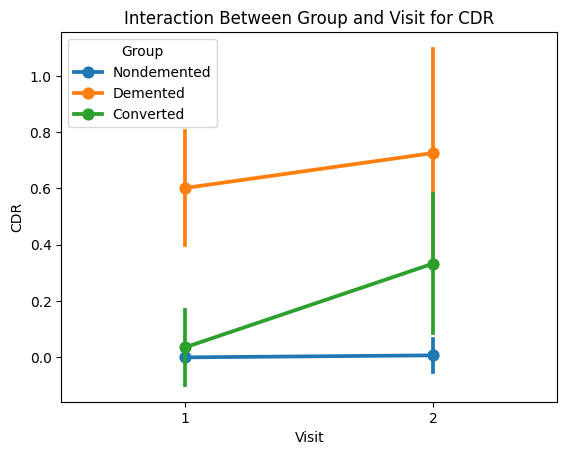

                W          pval  equal_var
levene  21.094714  2.785214e-09      False
               W     pval  equal_var
levene  0.948773  0.38841       True

POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric          T      dof  alternative      p-unc    p-corr  p-adjust                                                 BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  -------  -------  -------------  -------  --------  ----------  -------------------------------------------------  --------
Visit          -        1          2            True      True           -4.095  143.000  two-sided        0.000   nan      nan                                                   222.884    -0.209
Group          -        Converted  Demented     False     True          -10.295   37.846  two-sided        0.000     0.000  bonf                                        3721000000000.000    -1.944
Group          -        Converted  Nond

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc    p-corr  p-adjust                   BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  --------  ----------  -------------------  --------
Visit          -        1          2            True      True           9.672  143.000  two-sided        0.000   nan      nan         225800000000000.000     0.255
Group          -        Converted  Demented     False     True           1.401   14.676  two-sided        0.182     0.546  bonf                      0.668     0.469
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527     1.000  bonf                      0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.690  129.436  two-sided        0.000     0.001  bonf                     75.094    

In [26]:
!pip install pingouin
import pingouin as pg

file_path = 'INF2178_A4_data.csv'
df = pd.read_csv(file_path)

# Mixed ANOVA Model 1
aov1 = pg.mixed_anova(data=df, dv='CDR', between='Group', within='Visit', subject='Subject ID', correction=True)
print(aov1)

# Mixed ANOVA Model 2
aov2 = pg.mixed_anova(data=df, dv='nWBV', between='Group', within='Visit', subject='Subject ID', correction=True)
print(aov2)

# Interaction Plot for Model 1
sns.pointplot(data=df, x='Visit', y='CDR', hue='Group', ci='sd')
plt.title('Interaction Between Group and Visit for CDR')
plt.show()

# Homogeneity of variances test
homogeneity_test_cdr = pg.homoscedasticity(data=df, dv='CDR', group='Group')
print(homogeneity_test_cdr)
homogeneity_test_nwbv = pg.homoscedasticity(data=df, dv='nWBV', group='Group')
print(homogeneity_test_nwbv)

posthocs = pg.pairwise_ttests(dv='CDR', within='Visit', between='Group', subject='Subject ID', data=df, padjust='bonf')

# Print the results
pg.print_table(posthocs)


posthocs_nwbv = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df, padjust='bonf')

# Print the results for 'nWBV' analyses
pg.print_table(posthocs_nwbv)

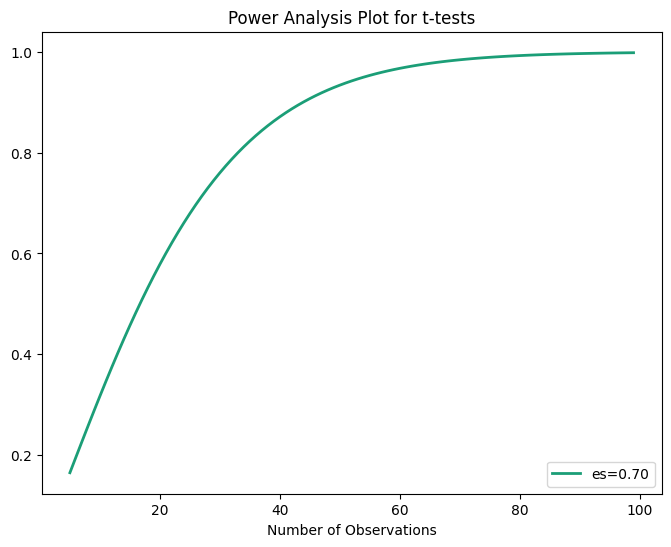

45.45073088568012

In [27]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
# Define the power analysis object again
power_analysis = TTestIndPower()

# Parameters for power analysis
effect_size = 0.7  # given effect size
alpha = 0.05       # significance level
power = 0.91       # desired power

# Calculate sample size for given effect, power, and alpha
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)

# Power analysis plot
fig, ax = plt.subplots(figsize=(8, 6))
power_analysis.plot_power(dep_var='nobs', nobs=np.arange(5, 100), effect_size=np.array([effect_size]), alpha=alpha, ax=ax)
ax.set_title('Power Analysis Plot for t-tests')
plt.show()

# Output the calculated sample size
sample_size


In [28]:
# count the number in each group
subject_counts_per_group = df.groupby('Group')['Subject ID'].nunique()
subject_counts_per_group


Group
Converted      14
Demented       64
Nondemented    72
Name: Subject ID, dtype: int64